In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing libraries
import numpy as np
import pandas as pd

#reading directory
import os
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss104.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss106.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss108.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss10.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss103.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss100.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss107.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss0.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss11.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss105.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss110.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss1.xml
/content/gdrive/MyDrive/input/mask_detection/annotations/maksssksksss102.xml
/cont

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Getting the annotations and image together
#bounding box fn
def bbox(obj):
  x_min = int(obj.find('xmin').text)
  y_min = int(obj.find('ymin').text)
  x_max = int(obj.find('xmax').text)
  y_max = int(obj.find('ymax').text)

  return [x_min, y_min, x_max, y_max]

#labelling fn
def bbox_label(obj):
  ''' 0 - not wearing a mask
    1 - wearing a mask
    2 - wearing a mask incorrectly '''

  if obj.find('name').text == "with_mask":
    return 1
  elif obj.find('name').text == "mask_weared_incorrect":
    return 2
  else:
    return 0

In [ ]:
#Parsing annotation file 
from bs4 import BeautifulSoup

def generate_target(image_id, file):
  with open(file) as f:
    data = f.read()
    soup = BeautifulSoup(data, 'xml')
    objects = soup.find_all('object')

    num_objs = len(objects)

    bboxes = []
    labels = []
    for i in objects:
      bboxes.append(bbox(i))
      labels.append(bbox_label(i))

    bboxes = np.array(bboxes)
    labels = np.array(labels)

    # = np.array(img_id)

    target = {}
    target["bboxes"] = bboxes
    target["labels"] = labels

    return (target, num_objs)

In [ ]:
images = list(sorted(os.listdir("/content/gdrive/MyDrive/input/mask_detection/images/")))
len(images)

853

In [ ]:
labels = list(sorted(os.listdir("/content/gdrive/MyDrive/input/mask_detection/annotations")))

In [ ]:
targets = []
numobjs = []

for i in range(853):
  file_image = 'maksssksksss' + str(i) + '.png'
  file_label = 'maksssksksss' + str(i) + '.xml'
  img_path = os.path.join("/content/gdrive/MyDrive/input/mask_detection/images", file_image)
  label_path = os.path.join("/content/gdrive/MyDrive/input/mask_detection/annotations", file_label)

  #generating label
  target, numobj = generate_target(i, label_path)
  targets.append(target)
  numobjs.append(numobj)


In [ ]:
targets

[{'bboxes': array([[ 79, 105, 109, 142],
         [185, 100, 226, 144],
         [325,  90, 360, 141]]), 'labels': array([0, 1, 0])},
 {'bboxes': array([[321,  34, 354,  69],
         [224,  38, 261,  73],
         [299,  58, 315,  81],
         [143,  74, 174, 115],
         [ 74,  69,  95,  99],
         [191,  67, 221,  93],
         [ 21,  73,  44,  93],
         [369,  70, 398,  99],
         [ 83,  56, 111,  89]]), 'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 0])},
 {'bboxes': array([[ 68,  42, 105,  69],
         [154,  47, 178,  74],
         [238,  34, 262,  69],
         [333,  31, 366,  65]]), 'labels': array([1, 1, 1, 2])},
 {'bboxes': array([[ 52,  53,  73,  76],
         [ 72,  53,  92,  75],
         [112,  51, 120,  68],
         [155,  60, 177,  83],
         [189,  59, 210,  80],
         [235,  57, 257,  78],
         [289,  60, 309,  83],
         [313,  68, 333,  90],
         [351,  35, 364,  59]]), 'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1])},
 {'bboxes': array([[ 7

In [ ]:
!pip install chainercv

In [ ]:
## vis
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12,7))
for i in range(5):
    image = random.choice(os.listdir("/content/gdrive/MyDrive/input/mask_detection/images"))
    plt.subplot(1,5,i+1)
    #img = load_img()
    plt.subplots_adjust(hspace=0.001)
    plt.xlabel("image")
    plt.imshow(image)
plt.show()

In [ ]:
'''Visualization snip
bbox on image V ''' 

# cv2.rectangle(img, pt1, pt2, color, thickness, lineType, shift)
# cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)              //openCV


# ChainerCV
import chainercv
import matplotlib

%matplotlib inline
from chainercv.visualizations import vis_bbox

img

In [ ]:
''' image path, read image, faces in image append, preprocess i/p '''
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
face_images=[]
face_labels=[]
for i in range(853):
  #/content/gdrive/MyDrive/input/mask_detection/images/maksssksksss0.png
    img_path = r"/content/gdrive/MyDrive/input/mask_detection/images/maksssksksss{}.png".format(i)
    #read image
    img = cv2.imread(img_path)
    for j in range(numobjs[i]):
#       get coordinates of ith image in list 
        locs=(targets[i]['bboxes'][j])
#     Get the face from the image using the coordinates
#the arguments are as ymin , ymax and xmin xmax
        img1=img[locs[1]:locs[3],locs[0]:locs[2]]
        img1 = cv2.resize(img1, (224, 224))
        img1 = img_to_array(img1)
        img1 = preprocess_input(img1)
        face_images.append(img1)
        face_labels.append(targets[i]['labels'][j])

face_images= np.array(face_images, dtype="float32")
face_labels = np.array(face_labels)



In [ ]:
 (trainX, testX, trainY, testY) = train_test_split(    , labels,
	test_size=0.2, stratify=labels, random_state=42)

In [ ]:
len(face_labels)

4072

In [ ]:
unique, counts = np.unique(face_labels, return_counts=True)
dict(zip(unique, counts))

{0: 717, 1: 3232, 2: 123}

In [ ]:
import pandas as pd 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout,BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import cv2
import random as rand

In [ ]:
lb = LabelEncoder()
labels = lb.fit_transform(face_labels)
labels = to_categorical(labels)
labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
#augmentation
aug = ImageDataGenerator(
    zoom_range=0.1,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [ ]:
#define the model
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_shape=(224, 224, 3))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.25)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(face_images, labels,
	test_size=0.2, stratify=labels, random_state=42)

In [ ]:
#Complie the model and train it
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,
class_weight = {0:5 , 1:1, 2:10}) #Here we sets weights to each class. 
#Class having high weight will be considered more importat while training

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
101/101 [==============================] - 122s 1s/step - loss: 1.6604 - accuracy: 0.6840 - val_loss: 0.6314 - val_accuracy: 0.7178
Epoch 2/20
101/101 [==============================] - 117s 1s/step - loss: 1.2921 - accuracy: 0.7761 - val_loss: 0.5340 - val_accuracy: 0.7828
Epoch 3/20
101/101 [==============================] - 116s 1s/step - loss: 1.1369 - accuracy: 0.8050 - val_loss: 0.4766 - val_accuracy: 0.8135
Epoch 4/20
101/101 [==============================] - 117s 1s/step - loss: 1.0052 - accuracy: 0.8332 - val_loss: 0.5012 - val_accuracy: 0.7951
Epoch 5/20
101/101 [==============================] - 116s 1s/step - loss: 0.9110 - accuracy: 0.8465 - val_loss: 0.4307 - val_accuracy: 0.8270
Epoch 6/20
101/101 [==============================] - 116s 1s/step - loss: 0.9025 - accuracy: 0.8447 - val_loss: 0.5143 - val_accuracy: 0.7926
Epoch 7/20
101/101 [==============================] - 116s 1s/step - loss: 0.8882 - accuracy: 0.8465 - val_loss: 0.4626 - val_accuracy: 0.8098

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.64      0.93      0.76       143
           1       0.98      0.85      0.91       647
           2       0.29      0.56      0.38        25

    accuracy                           0.85       815
   macro avg       0.64      0.78      0.68       815
weighted avg       0.90      0.85      0.86       815



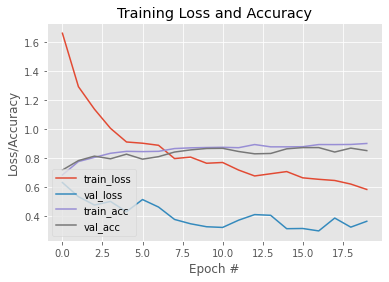

In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs
	))

# # serialize the model to disk
# print("[INFO] saving mask detector model...")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [ ]:
model.save('mask_detect.h5')

In [ ]:
#load the saved model
import keras
model = keras.models.load_model('mask_detect.h5')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
image_path = "/content/flumask-feature-470x313.jpg"
model.predict(image_path)

IndexError: ignored

In [ ]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=32)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs
	))

# # serialize the model to disk
# print("[INFO] saving mask detector model...")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

[INFO] evaluating network...


KeyboardInterrupt: ignored

error: ignored